The best model considering models from step 1 and 3 is Random Forest Regressor without hyper parameter tuning. So, we consider random forest regressor algorithm for bi-directional elimination as wrapper method

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
#reading csv file
data = pd.read_csv('/content/drive/MyDrive/new_election_dataset (1).csv')
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date
0,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,17,0,34.33,35.95,2187,7,7,0
1,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,1,0,7.47,7.82,476,1,2,0
2,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,2,0,6.14,6.43,391,1,1,0
3,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,11,0,2.39,2.50,152,0,0,0
4,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,10,0,2.04,2.14,130,0,0,0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [5]:
# Preparing Data set
# dropping Final Mandate variable from X
#assign the value of y for training
x = data.drop(columns=['FinalMandates'])
y = data[["FinalMandates"]]

In [6]:
#Standardizing value of x by using standardscalar to make the data normally distributed
sc = StandardScaler()
a = sc.fit_transform(x)
df_new_x = pd.DataFrame(a,columns=x.columns)
df_new_x.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,Date
0,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,1.177919,-0.206043,4.612609,4.603604,-0.190208,4.560088,-0.421705
1,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,-1.435236,-0.206043,0.644624,0.642757,-0.282371,0.445033,-0.421705
2,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,-1.271914,-0.206043,0.448145,0.447038,-0.286949,0.445033,-0.421705
3,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,0.197986,-0.206043,-0.105837,-0.106326,-0.299823,-0.240810,-0.421705
4,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,0.034664,-0.206043,-0.157542,-0.157016,-0.301008,-0.240810,-0.421705


In [7]:
# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(df_new_x, y, test_size=0.2, random_state=42)


In [8]:
# Using Random Forest Regressor
model = RandomForestRegressor()

In [19]:
# preform bidirectional elimination for feature selection
feature_selector = SequentialFeatureSelector(model, k_features=6, forward=True, floating=True,cv=0) #k_features is taken as 6 for computational purposes
feature_selector.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selector.est_.fit(X[:, IDX], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selector.est_.fit(X[:, IDX], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selector.est_.fit(X[:, IDX], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed whe

SequentialFeatureSelector(cv=0, estimator=RandomForestRegressor(),
                          floating=True, k_features=(6, 6), scoring='r2')

In [20]:
# Get the selected features with indices
selected_features_indices = feature_selector.k_feature_idx_

# Convert indices to a list
selected_features_indices_list = list(selected_features_indices)

# Train the final model with the selected features
final_model = RandomForestRegressor()
final_model.fit(X_train.iloc[:, selected_features_indices_list], y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test.iloc[:, selected_features_indices_list])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#Get the names of the selected features
selected_features_names = X_train.columns[selected_features_indices_list]

# Display the names of the selected features
print('Selected Features:')
print(selected_features_names)


<ipython-input-20-de54625603cc>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(X_train.iloc[:, selected_features_indices_list], y_train)


Mean Squared Error: 0.0014077447504772295
Selected Features:
Index(['totalMandates', 'availableMandates', 'votersPercentage', 'Party',
       'Percentage', 'Hondt'],
      dtype='object')


In [21]:
# Make predictions on the training set
y_train_pred = final_model.predict(X_train.iloc[:, selected_features_indices_list])

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error (Training):', mse_train)

# Make predictions on the test set
y_test_pred = final_model.predict(X_test.iloc[:, selected_features_indices_list])

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Testing):', mse_test)


Mean Squared Error (Training): 2.5998909041320057e-05
Mean Squared Error (Testing): 0.0014077447504772295


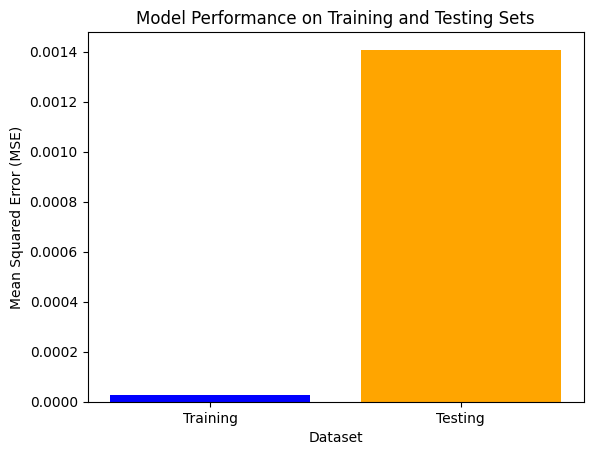

In [22]:
import matplotlib.pyplot as plt

# Plotting bar plots for training and testing MSE
labels = ['Training', 'Testing']
mse_values = [mse_train, mse_test]

plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance on Training and Testing Sets')
plt.show()
